**[ CNN 관련 참고자료 ]**

<br>

http://taewan.kim/post/cnn/ (한글 설명) 
<br>

https://poloclub.github.io/cnn-explainer/ (CNN 내부의 구체적인 계산 과정 시각화) 

<br>

https://yceffort.kr/2019/01/29/pytorch-3-convolutional-neural-network (필터 예시) 
<br>

https://towardsdatascience.com/intuitively-understanding-convolutions-for-deep-learning-1f6f42faee1 (필터 예시) 
<br>

https://goo.gl/zsSQ8z (필터 예시) 

<br>

https://blog.exxactcorp.com/lets-learn-the-difference-between-a-deep-learning-cnn-and-rnn/ (필터 적용 예시 on MNIST) 
<br>

https://medium.com/@phidaouss/convolutional-neural-networks-cnn-or-convnets-d7c688b0a207 (필터 적용 시각화)

<br>

https://www.slideshare.net/yongho/ss-79607172 (CNN 개념 이해) 
<br>

https://www.youtube.com/playlist?list=PLl1irxoYh2wzOOU9hvJqMYc215wAlxrpp (CNN 개념 이해)

<br>
<br>

## 1. Convolution & Filter (Kernel)

<br>
<br>

A convolution is a filter that passes over an image, processes it, and extracts the important features.
<br>

Let's say you have an image of a person wearing a sneaker. 
<br>
How would you detect that a sneaker is present in the image? 
<br>
In order for your program to "see" the image as a sneaker, you'll have to **extract the important features, and blur the inessential features**. 
<br>
This is called **feature mapping**.
<br>

The feature mapping process is theoretically simple. <br>You'll scan every pixel in the image and then look at its neighboring pixels. <br>You multiply the values of those pixels by the equivalent weights in a filter.

<hr>

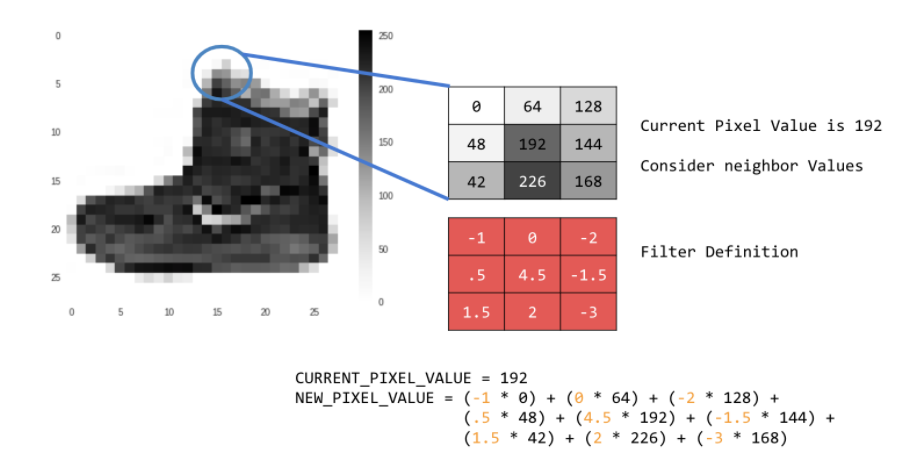

In this case, a **3x3 convolution matrix**, or **image kernel**, is specified.

The current pixel value is 192. <br>You can calculate the value of the new pixel by looking at the neighbor values, <br>multiplying them by the values specified in the filter, <br>and making the new pixel value the final amount.

Now it's time to explore how convolutions work by creating a **basic convolution on a 2D grayscale image**.

You'll demonstrate that with the ascent image from SciPy. <br>It's a nice built-in picture with lots of angles and lines.

In [ ]:
!pip install opencv-python==4.5.5.62

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import cv2
from scipy import misc

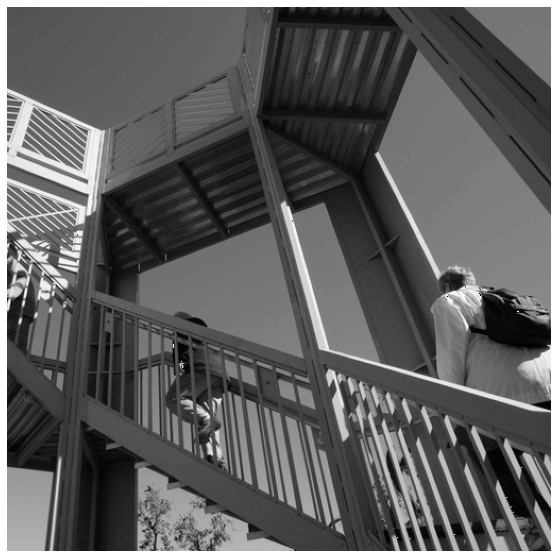

In [3]:
i = misc.ascent()

plt.figure(figsize=(10, 10))
plt.grid(False)
plt.gray()
plt.axis('off')
plt.imshow(i)
plt.show()

You can see that it's an image of a stairwell. 
<br>There are lots of features you can try and isolate. 
<br>For example, there are **strong vertical lines**.

The image is stored as a NumPy array, so we can create the transformed image by just copying that array. 
<br>The size_x and size_y variables will hold the dimensions of the image so you can loop over it later.

In [4]:
i_transformed = np.copy(i)

size_x = i_transformed.shape[0]
size_y = i_transformed.shape[1]

<br>

First, make a **convolution matrix (or kernel)** as a **3x3 array**

In [5]:
# This filter detects edges nicely
# It creates a filter that only passes through sharp edges and straight lines. 
# Experiment with different values for fun effects.
#filter = [ [0, 1, 0], [1, -4, 1], [0, 1, 0] ] 

# A couple more filters to try for fun!
filter = [ [-1, -2, -1], [0, 0, 0], [1, 2, 1] ]
# filter = [ [-1, 0, 1], [-2, 0, 2], [-1, 0, 1] ]

# If all the digits in the filter don't add up to 0 or 1, you 
# should probably do a weight to get it to do so
# so, for example, if your weights are 1,1,1 1,2,1 1,1,1
# They add up to 10, so you would set a weight of .1 if you want to normalize them

weight  = 1

Now, calculate the output pixels. 
<br>Iterate over the image, leaving a 1-pixel margin, and multiply each of the neighbors of the current pixel by the value defined in the filter.

<br>
That means that the current pixel's neighbor above it and to the left of it will be multiplied by the top-left item in the filter. 
<br> 
Then, multiply the result by the weight and ensure that the result is in the range 0 through 255.
<br>
<br>

Finally, load the new value into the transformed image:

In [6]:
for x in range(1, size_x - 1):
    for y in range(1, size_y - 1):
        output_pixel = 0.0
        output_pixel = output_pixel + (i[x - 1, y - 1] * filter[0][0])
        output_pixel = output_pixel + (i[x,     y - 1] * filter[0][1])
        output_pixel = output_pixel + (i[x + 1, y - 1] * filter[0][2])
        output_pixel = output_pixel + (i[x - 1, y    ] * filter[1][0])
        output_pixel = output_pixel + (i[x    , y    ] * filter[1][1])
        output_pixel = output_pixel + (i[x + 1, y    ] * filter[1][2])
        output_pixel = output_pixel + (i[x - 1, y + 1] * filter[2][0])
        output_pixel = output_pixel + (i[x    , y + 1] * filter[2][1])
        output_pixel = output_pixel + (i[x + 1, y + 1] * filter[2][2])
        output_pixel = output_pixel * weight
        
        # ensure that the result is in the range 0 through 255
        if(output_pixel < 0):
            output_pixel = 0
            
        if(output_pixel > 255):
            output_pixel = 255
        
        i_transformed[x, y] = output_pixel

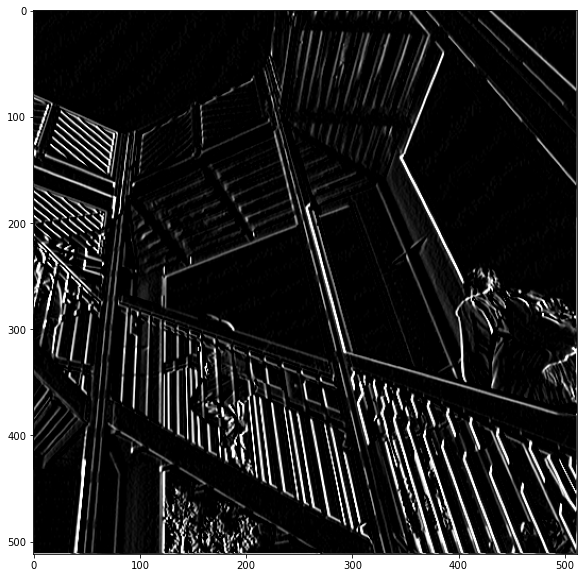

In [7]:
# Plot the image. Note the size of the axes -- they are 512 by 512

plt.figure(figsize=(10, 10))
plt.gray()
plt.grid(False)
plt.imshow(i_transformed)
#plt.axis('off')
plt.show()   

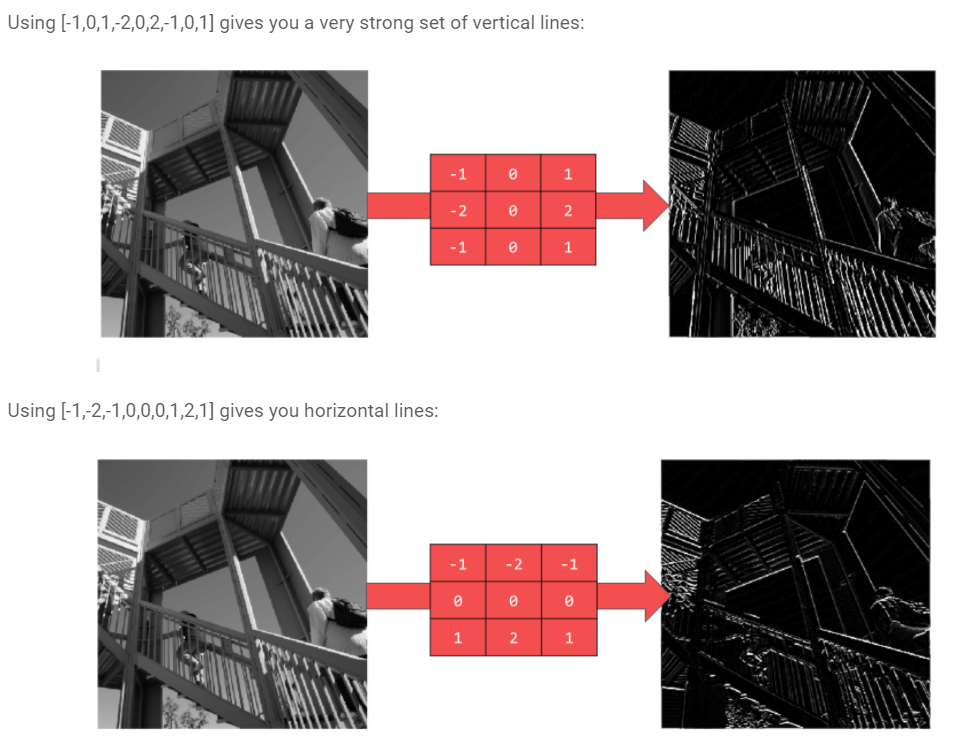

<p style="margin-left: 70%">* 위에서 2가지 결과가 서로 뒤바뀐 것으로 판단됨</p>

<br>
<br>

## 2. Pooling

<br>
<br>

Now that you've identified the essential features of the image, what do you do? 
<br>How do you use the resulting feature map to classify images?

<br>

Similar to convolutions, **pooling greatly helps with detecting features**. 
<br>
Pooling layers **reduce the overall amount of information** in an image 
<br>
while **maintaining the features that are detected** as present.

<br>

There are a number of different types of pooling, but you'll use one called **Maximum (Max) Pooling**.
<br>
Iterate over the image and, at each point, consider the pixel and its immediate neighbors to the right, beneath, and right-beneath. 
<br>
Take the largest of those (hence max pooling) and load it into the new image. 
<br>
Thus, the new image will be one-fourth the size of the old.

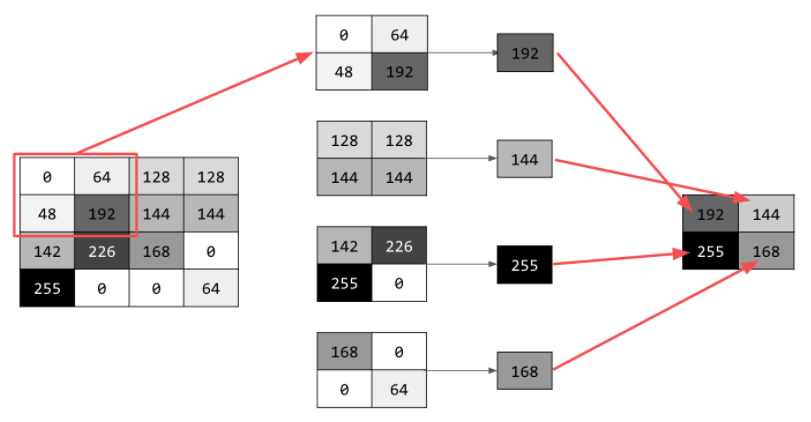

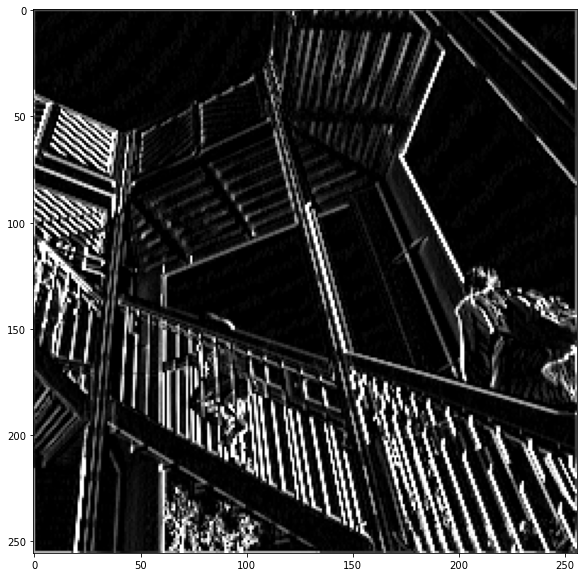

In [8]:
# The following code will show a (2, 2) pooling. Run it to see the output.
# You'll see that while the image is one-fourth the size of the original, it kept all the features.

new_x = int(size_x / 2)
new_y = int(size_y / 2)

newImage = np.zeros((new_x, new_y))

for x in range(0, size_x, 2):
    for y in range(0, size_y, 2):
        
        pixels = []
        pixels.append(i_transformed[x    , y    ])
        pixels.append(i_transformed[x + 1, y    ])
        pixels.append(i_transformed[x    , y + 1])
        pixels.append(i_transformed[x + 1, y + 1])
        
        pixels.sort(reverse=True)
        
        newImage[int(x / 2), int(y / 2)] = pixels[0]

# Plot the image. 
# Note the size of the axes -- now 256 pixels instead of 512

plt.figure(figsize=(10, 10))
plt.gray()
plt.grid(False)
plt.imshow(newImage)
#plt.axis('off')
plt.show()

Note the axes of that plot. 
<br>The image is now 256x256, one-fourth of its original size, 
<br>and the detected features have been enhanced despite less data now being in the image.